# 🗂️Não perca a classe!

Guerreiros da missão: **Tsuru** (Júlia Guedes Almeida dos Santos), **Pólux** (Raquel de Godoy Vianna) e **Tiles** (Thalles José de Souza Cansi).

> O que os olhos não veêm, o coração não sente

## 🖼️ Enunciado

<div style="text-align: justify;">
Um algoritmo regressor <em>k -NN </em> foi implementado na sala de aula.
Você tem duas tarefas: a primeira é alterar o código feito em sala para transformar o
regressor <em>k -NN </em> em um classificador <em>k -NN </em>; a segunda é alterar a métrica de distância
de distância Euclidiana para distância Manhattan. Após as alterações, teste seu
classificador para prever a espécie de pinguim do dataset de pinguins.
</div>

## 📝 Introdução

<div style="text-align: justify;">
Depois de estudar sobre algumas ferramentas fundamentais para a criação de algoritmos de aprendizado de máquina, tais como normalizadores, codificadores e iteradores, agora estamos confortáveis para explorar o nosos primeiro modelo! Novamente, para aplicar nossas pesquisas, iremos utilizar o dataset <em>penguins</em> da biblioteca Seaborn. 

Para esta missão, o modelo escolhido foi o <strong><em>k -NN </em> vizinhos </strong> (k-Nearest Neighbors), o qual possui um conceito bem simples: considerando que todos os objetos se encontram em um plano, onde cada um deles é localizado a partir das distâncias entre seus atributos (features), o algoritmo calcula a distância desse novo objeto em relação aos demais. Assim, ele estima corretamente o alvo (target) com base nos $n$ vizinhos mais próximos a essa entrada (neste caso, um pinguim).

Durante as pesquisas na Biblioteca Real, apenas encontramos exemplos de <em>k -NN </em> regressores, que utilizam targets <strong>numéricos</strong>. A partir disso, iremos tentar enfrentar um grande desafio: aplicar esse algoritmo para targets <strong>categóricos</strong>, implementando um <strong><em> k-NN classificador</strong></em>, com o objetivo de identificar a espécie do pinguim com base nos demais atributos. Para esse fim, iremos modificar o modelo <strong> k- NN regressor </strong> visto em aula e utilizar o modelo categórico da biblioteca scikit - learn. Além disso, para complementar nossa missão, como estaremos trabalhando com muitos atributos, iremos explorar a distância Manhattan.
</div>

## 🗡️ Que comecem os códigos!

### 📚 Importação de bibliotecas

Como primeiro passo, precisaremos importar a biblioteca ``Seaborn``, para obter o dataset; alguns módulos da biblioteca ``Scikit-learn``, para conseguir normalizar os dados (Utilizaremos o normalizador padrão aprendido na quest de normalizadores), criar o modelo e realizar a separação entre os dados de treino e os dados de teste; e a biblioteca Pandas para facilitar a visualização dos dados.


In [91]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import statistics as st


### 🐧Importação do dataset

Agora, definiremos o nosso dataset.

In [92]:
dataset_pinguins = sns.load_dataset("penguins")
display(dataset_pinguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### 🩹 Tratamento dos dados

Antes de aplicar o modelo, é necessário, como verificado nas missões passadas, realizar um tratamento no dataset, a fim de **eliminar os dados faltantes** - para que esses não influenciem negativamente no treinamento do modelo-, e **normalizar** os dados restantes - a fim de que as distâncias sejam comparáveis.

In [93]:
dataset_pinguins_tratado = dataset_pinguins.dropna()
display(dataset_pinguins_tratado)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [94]:
for coluna in dataset_pinguins_tratado.columns:
    
    if dataset_pinguins_tratado[coluna].dtypes in [int, float]:
    
        dados = dataset_pinguins_tratado[coluna].values.reshape(-1, 1)
        
        normalizador = StandardScaler()

        normalizador.fit(dados)

        dados_normalizados = normalizador.transform(dados)
        
        dataset_pinguins_tratado.loc[:, coluna] = dados_normalizados.flatten()
        
display(dataset_pinguins_tratado)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
4,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
5,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,Female
340,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,Female
341,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,Male
342,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,Female


In [95]:
dp = dataset_pinguins_tratado

### 🔎Treino ou teste?

Para poder, posteriormente, realizar uma análise da eficácia do modelo, antes de começarmos, precisamos separar o conjunto de dados entre dados de **treino** (90% do conjunto de dados original) e dados **teste** (Restante dos dados dados do dataframe original), através da função ``train_test_split`` do módulo ``model_selection``. 

In [96]:
tamanho_teste = 0.1
seed = 381181295

indices = dp.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=tamanho_teste, random_state=seed, shuffle=True
)

dp_treino = dp.loc[indices_treino]
dp_teste = dp.loc[indices_teste]

In [97]:
dp_treino

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
60,Adelie,Biscoe,-1.518701,-0.134704,-1.140929,-1.314738,Female
288,Gentoo,Biscoe,-0.090248,-1.507858,1.360017,0.613109,Female
199,Chinstrap,Dream,0.916995,1.238450,0.788372,0.115600,Male
306,Gentoo,Biscoe,-0.108561,-1.406143,1.217106,0.488731,Female
328,Gentoo,Biscoe,-0.126875,-1.609573,0.502550,0.457637,Female
...,...,...,...,...,...,...,...
77,Adelie,Torgersen,-1.243998,1.136735,-1.212385,-0.381909,Male
233,Gentoo,Biscoe,0.807114,-1.304427,0.859828,2.043446,Male
155,Chinstrap,Dream,0.257709,0.780732,-0.926562,-0.848323,Female
117,Adelie,Torgersen,-1.225685,1.696168,-0.140551,-0.537380,Male


In [98]:
dp_teste

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
39,Adelie,Dream,-0.767847,0.984162,-1.212385,0.550920,Male
280,Gentoo,Biscoe,0.239395,-1.711288,0.502550,-0.008777,Female
227,Gentoo,Biscoe,0.495785,-0.948425,1.288561,1.234995,Male
320,Gentoo,Biscoe,0.825428,-1.100997,1.288561,0.799674,Female
108,Adelie,Biscoe,-1.079177,-0.083846,-1.426752,-1.283644,Female
54,Adelie,Biscoe,-1.738463,0.475587,-0.998018,-1.625681,Female
59,Adelie,Biscoe,-1.170744,0.984162,-0.497829,-0.568475,Male
122,Adelie,Torgersen,-0.694593,-0.083846,-1.784030,-0.941606,Female
252,Gentoo,Biscoe,0.202768,-1.355285,0.431094,1.048429,Female
132,Adelie,Dream,-1.317253,0.679017,-0.569284,-0.879418,Female


### 🎯Atributo ou Target? 

<div style="text-align: justify;">
Estamos quase chegando no modelo! Antes de aplicá-lo, no entanto, precisamos definir uma importante questão: Qual será o nosso <bold>target</bold>? Como mencionado anteriormente, o objetivo principal desse modelo será identificar a espécie de pinguim com base nos seus atributos. Logo, podemos dizer que a coluna df_treino["species"] será o nosso y do modelo preditivo, enquanto as demais colunas serão os atributos, correspondente ao x. Para facilitar a manipulação dos dados, esses dados serão separados em dois dataframes distintos: dp_treino_target e dp_treino_features. Após isso, com o objetivo de melhorar a manipulação dos dados, os dataframes serão convertidos em arrays numpy sendo esses, respectivamente, X_treino e y_treino. O mesmo será feito para o dataframe de teste.
</div>

*Dados de treino*

In [99]:
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
target = ["species"]

dp_treino_target = dp_treino.reindex(target, axis=1)
dp_treino_features = dp_treino.reindex(features, axis=1)

X_treino = dp_treino_features.values 
y_treino = dp_treino_target.values.ravel()

*Dados de teste*

In [100]:
dp_teste_target = dp_teste.reindex(target, axis=1)
dp_teste_features = dp_teste.reindex(features, axis=1)

X_teste = dp_teste_features.values 
y_teste = dp_teste_target.values.ravel()

### 🏠🏡 Modelo *k-NN* vizinhos (e distância Manhattan)

Como previamente mencionado, o modelo <em> k-NN</em> baseia-se na distância entre o objeto de entrada e os objetos previamente utilizados no treino do modelo em um pano. Para calcular essa distância (argumento $p$ da função ``KNeighborsClassifier``), a maneira padrão é a utilização da distância **euclidiana** (p=2).
<div style="text-align: justify;">
Essa calcula a menor distância entre dois pontos, tal como definido pela fórmula abaixo:

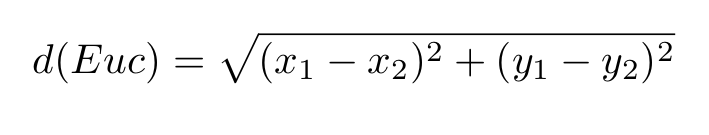

<div style="text-align: justify;">
 No entanto, distância euclidiana não é muito eficaz para conjunto de dados com mais de três dimensões, visto que, quando trabalhamos com muitas dimensões, a distribuição das distâncias torna-se mais uniforme, dificultando a distinção desses valores, como explicado pela "Maldição da dimensionalidade" [5]. Nessas situações a <strong>Distância Manhattan</strong> (p=1) é o padrão. Essa é calculada a partir da soma das diferenças absolutas entre as coordenadas correspondentes aos pontos, como indicado pela fórmula abaixo [3][4]: 
</div>

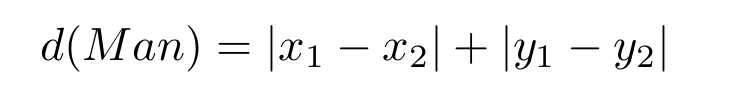

Convertendo essa fórmula em uma função do Python, temos que:

In [111]:
def calcula_distancia_manhattan(coordenada_1, coordenada_2):
    distancia = 0
    for c1,c2 in zip(coordenada_1, coordenada_2):
        distancia += abs(c1-c2)

    return distancia

Aplicando a distância Manhattan para calcular as distâncias entre os dados de teste definidos acima, iremos (finalmente) gerar o modelo <strong><em>k-NN</em> classificador</strong>. Para a aplicação do modelo, podemos reaproveitar o código feito em aula [6], bem como utilizar o sckit-learn.

##### Modelo modificado

In [101]:
def treinar_knn(num_de_vizinhos, modelo, X, y):
    modelo["num_vizinhos"] = num_de_vizinhos
    modelo["atributos"] = X
    modelo["target"] = y


def previsao_knn_classificador(modelo, X):
    X = list(X)
    previsoes = []
    for x in X:
        distancias = []
        

        for pinguim in modelo["atributos"]:
            distancia_calculada = calcula_distancia_manhattan(pinguim, x)
            distancias.append(distancia_calculada)

        indices = np.argsort(distancias)[:modelo["num_vizinhos"]]

        targets = modelo["target"][indices].flatten()
        
        y_previsto = st.mode(targets)
        
        previsoes.append(y_previsto)

    return previsoes

##### Modelo Scikit-learn

In [102]:
num_vizinhos = 5

modelo_knn_classificador= KNeighborsClassifier(n_neighbors=num_vizinhos, p=1)

modelo_knn_classificador.fit(X_treino, y_treino)

KNeighborsClassifier(p=1)

### 🧪Testando o modelo!

Com o nosso modelo pronto, agora podemos testá-lo com os dados separados para treino.

##### Modelo modificado

In [103]:
modelo = {}

treinar_knn(5, modelo, X_treino, y_treino)

previsao_knn_classificador(modelo, X_teste)

previsao_modelo_modificado = previsao_knn_classificador(modelo, X_teste)
print(previsao_modelo_modificado)

['Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo']


##### Modelo scikit - learn

In [112]:
previsao_scikit = modelo_knn_classificador.predict(X_teste)
print(previsao_scikit)

['Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Chinstrap' 'Chinstrap' 'Gentoo'
 'Gentoo' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo']


Para facilitar a visualização, podemos transformar esses dados em dataframes

##### Dataframe - Modelo Modificado

In [106]:
df_previsao_modelo_modificado= pd.DataFrame(previsao_modelo_modificado, columns = ["species"])
display(df_previsao_modelo_modificado)

,species
0,Adelie
1,Gentoo
2,Gentoo
3,Gentoo
4,Adelie
5,Adelie
6,Adelie
7,Adelie
8,Gentoo
9,Adelie


##### Dataframe - Modelo Scikit - Learn

In [113]:
df_previsao_scikit= pd.DataFrame(previsao_sckit, columns = ["species"])
display(df_previsao_scikit)

,species
0,Adelie
1,Gentoo
2,Gentoo
3,Gentoo
4,Adelie
5,Adelie
6,Adelie
7,Adelie
8,Gentoo
9,Adelie


### 🔬 Análise da acurácia

Como separamos os dados para teste, agora podemos comparar os resultados obtidos pelos modelos com os resultados reais (y_teste).  Por estarmos lidando com um target **categórico**, métricas como o RMSE não poderão ser utilizadas. Dessa forma, para descobrir a eficácia do modelo, precisaremos descobrir a porcentagem de acertos do algoritmos. Isso será feito através da comparação entre os dois conjuntos de dados y, através da função ``acurácia``.

*Esses são os nossos dados reais:*

In [107]:
print(y_teste)

['Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Chinstrap' 'Chinstrap' 'Gentoo'
 'Gentoo' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo']


In [108]:
def acuracia(y_real, y_modelo):
    quant_entradas = len(y_real)
    respostas_corretas = 0
    for resultado_real, resultado_previsto in zip(y_real, y_modelo):
        if resultado_real == resultado_previsto:
            respostas_corretas += 1
    porcentagem_acertos = (respostas_corretas/quant_entradas) *  100
    print(f"A acurácia do modelo é de {porcentagem_acertos} %")   

##### Acurácia com Modelo Modificado

In [110]:
acuracia(y_teste, previsao_modelo_modificado)

A acurácia do modelo é de 100.0 %


##### Acurácia com scikit-learn

In [114]:
acuracia(y_teste, previsao_scikit)

A acurácia do modelo é de 100.0 %


A partir dessa função, descobrimos que os nossos modelos acertaram a espécie de 100% das entradas de teste. * Uau!

*Pensamentos do grupo: Será que a eficácia pode ser alterada por algum hiperparâmetro, como o número de vizinhos? Devemos testar isso na nossa próxima missão...

## 🛡️ Conclusão

<div style="text-align: justify;">
A partir dos nossos estudos, conseguimos concluir que o modelo <em>k-NN vizinhos</em> é um tipo de algoritmo de aprendizado de máquina preditivo poderoso, que pode ser utilizado tanto para a <strong>regressão</strong>, quando utilizamos dados contínuos, quanto para a <strong>classificação</strong>, para targets discretos. 

Seu ponto forte está na simplicidade de aplicação (conseguimos aplicar o modelo utilizando poucas células! O tratamento de dados anterior a aplicação é que foi a parte mais trabalhosa). Utilizando bibliotecas como o sckit - learn, é possível otimizar ainda mais esse processo. No entanto, como ocorre em praticamente todos os modelos de aprendizado de máquina, a eficácia do <em> k-NN</em> depende de escolhas cuidadosas, como o número de vizinhos, a métrica de distância, e a normalização dos dados, visto que o desempenho pode ser influenciado por fatores como o ruído nos dados (gerados pelo interessante conceito da "Maldição da Dimensionalidade" - nome épico para um problema não tão épico assim) e escala dos atributos/targets. 

Além disso, também conseguimos descobrir mais sobre medidas de distância. Quem poderia imaginar que a tradicional geometria euclidiana pode não ser a mais eficiente para medir dois pontos?

Os cavaleiros Tsuru, Pólux e Tiles esperam que esse trabalho possa ser bem aproveitado pelos cidadãos de Lumi. Que a sede de conhecimento por novos modelos esteja sempre com vocês! ⚔️
</div>

## 📚 Referências

[1] Jupyter Notebooks: Dicas de Formatação - BRAINS. 30 de dezembro de 2022, https://brains.dev/2022/jupyter-notebooks-dicas-de-formatacao/.

[2] “KNeighborsClassifier”. Scikit-Learn, https://scikit-learn/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html. Acesso em 7 de setembro de 2024.

[3] Pinto, Ricardo. “Entendendo Porque é Que a Distância Certa Faz Toda a Diferença”. Data Hackers, 24 de agosto de 2020, https://medium.com/data-hackers/entendendo-porque-%C3%A9-que-a-dist%C3%A2ncia-certa-faz-toda-a-diferen%C3%A7a-648030c9bae2.

[4] Eduardo, José. “Distâncias - 3 mais usadas em IA”. Blog, 13 de dezembro de 2022, https://www.meuguru.com/blog/distancia-3-mais-usadas/.

[5] Arcanjo, Jonys. “Maldição Da Dimensionalidade”. Data Hackers, 25 de setembro de 2022, https://medium.com/data-hackers/maldi%C3%A7%C3%A3o-da-dimensionalidade-655e4342d64.

[6] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 2.1 - Aprendizado de máquina, k-NN e métricas*. [Material não publicado].

[7] seaborn.load_dataset — seaborn 0.13.2 documentation. https://seaborn.pydata.org/generated/seaborn.load_dataset.html. Acesso em 23 de setembro de 2024.
